In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [2]:
orig_data = pd.read_csv('../datasets/data_clean.csv')
orig_data.head(3)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS


In [3]:
data1 = orig_data.copy()

#### Examine the data

In [4]:
data1.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
data1.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S
157,18.0,131.0,8.0,76,9,29,2010,76,C


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [7]:
data1.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [8]:
data1.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

#### a. Change datatypes

In [9]:
data1['Temp C'] = pd.to_numeric(data1['Temp C'], errors='coerce')

In [10]:
data1['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [11]:
data1['Month'] = pd.to_numeric(data1['Month'], errors='coerce')

In [12]:
data1['Weather'] = data1['Weather'].astype('category')

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


#### b. Check the columns

In [14]:
data1[ data1['Temp C'] != data1['Temp'] ]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
10,7.0,NaN,6.9,NaN,5.0,11,2010,74,C


In [15]:
data1.drop('Temp C', axis=1, inplace=True)

In [16]:
data1['Year'].nunique()

1

In [17]:
data1['Year'].unique()

array([2010])

In [18]:
data1.drop('Year', axis=1, inplace=True)

In [19]:
data1.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

#### c. Rename Columns

In [20]:
data1.rename(columns={'Solar.R':'Solar'}, inplace=True)

In [21]:
data2 = data1.copy()

#### d. Duplicate Records

In [22]:
data2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [23]:
data2[data2.duplicated(keep=False)]

,Ozone,Solar,Wind,Month,Day,Temp,Weather
150,14.0,191.0,14.3,9.0,28,75,S
156,14.0,191.0,14.3,9.0,28,75,S


In [24]:
data2.drop_duplicates(inplace=True)

#### e. Null value Imputation

In [25]:
data2.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Temp        0
Weather     3
dtype: int64

In [27]:
avg_ozone = data2['Ozone'].mean()
avg_ozone

41.81512605042017

In [28]:
avg_solar = data2['Solar'].mean()
avg_solar

185.36666666666667

In [29]:
data2['Weather'].mode()

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [31]:
mode_weather = data2['Weather'].mode()[0]
mode_weather

'S'

In [33]:
data2.fillna({'Ozone':avg_ozone, 'Solar':avg_solar,'Weather':mode_weather}, inplace=True)

In [34]:
data2.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Temp       0
Weather    0
dtype: int64

In [36]:
data2.dropna(inplace=True)

#### f. Correlation Analysis

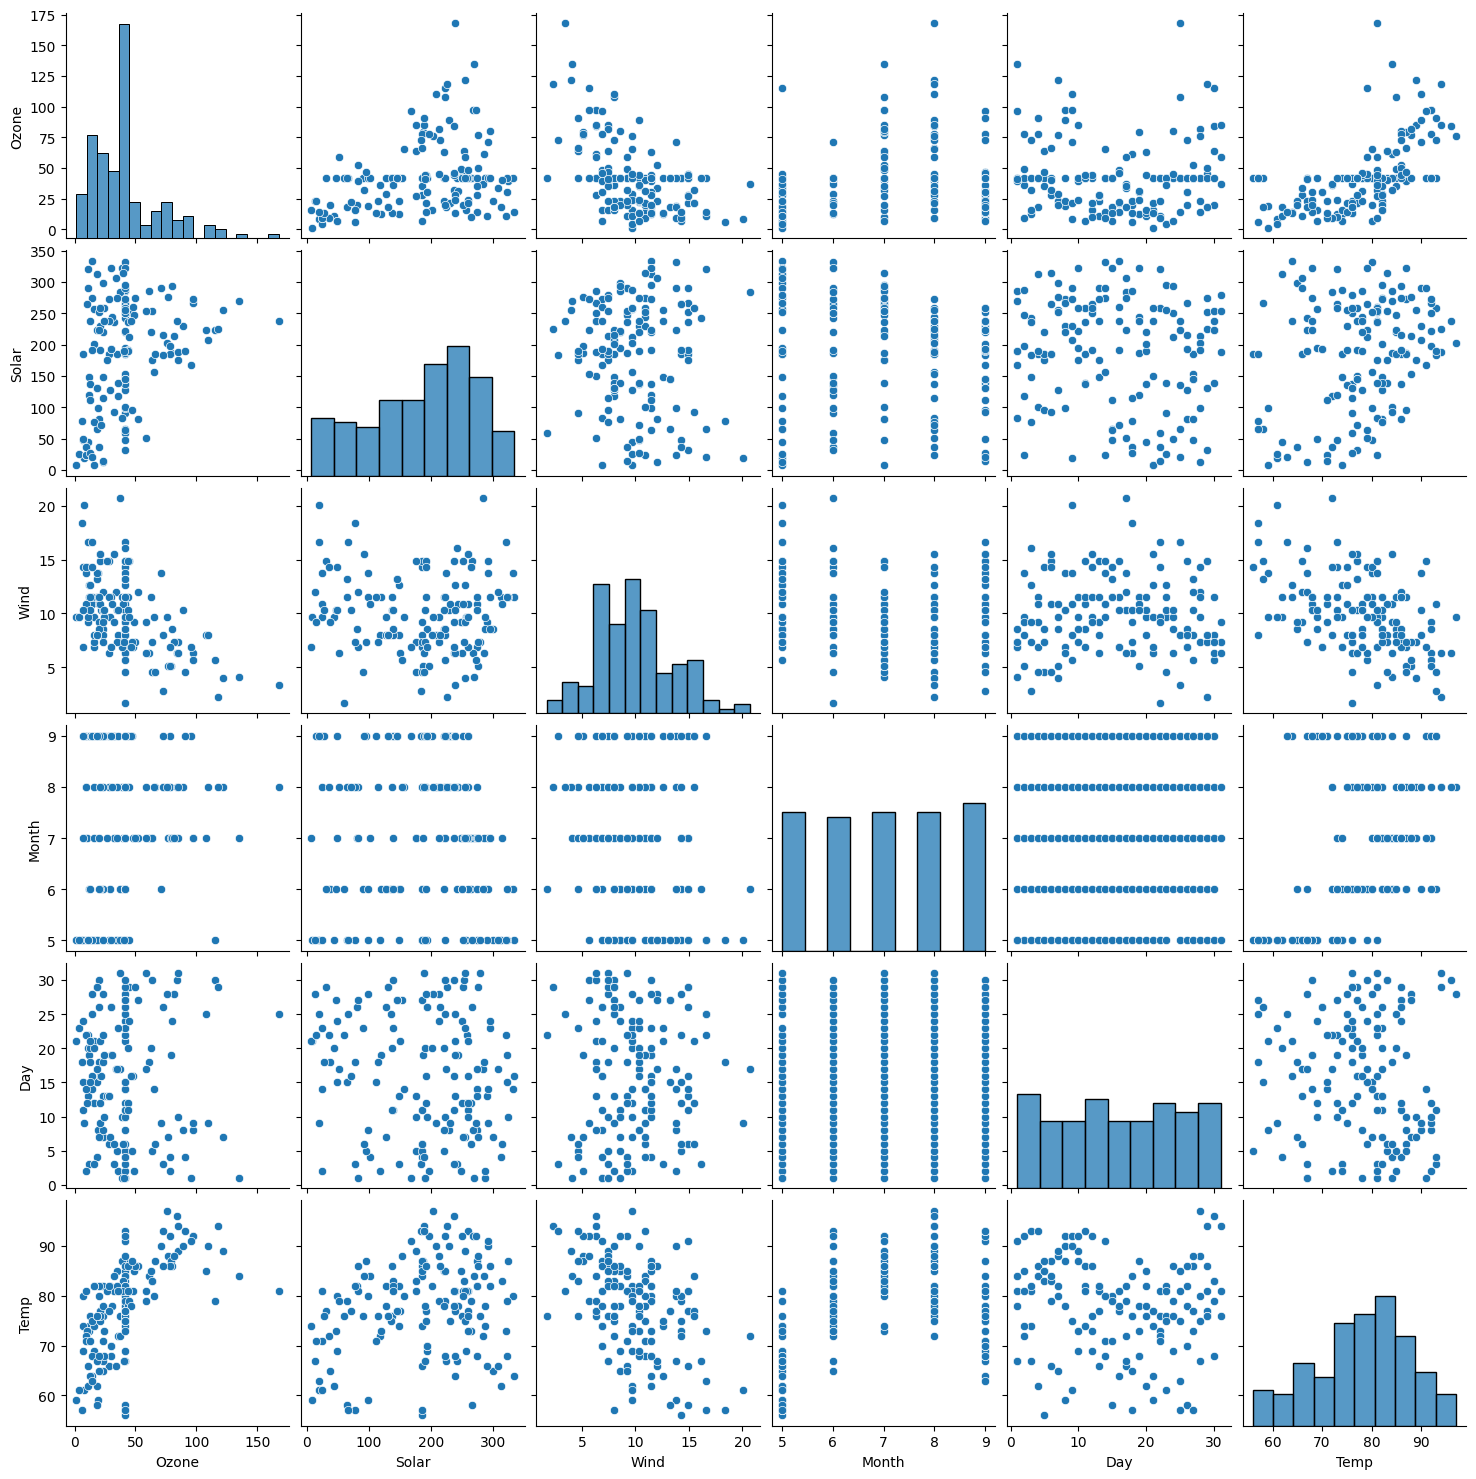

In [38]:
sns.pairplot(data2)
plt.show()

In [43]:
data2._get_numeric_data().corr()

,Ozone,Solar,Wind,Month,Day,Temp
Ozone,1.000000,0.303412,-0.519472,0.132860,-0.019971,0.609022
Solar,0.303412,1.000000,-0.052037,-0.090902,-0.145703,0.251867
Wind,-0.519472,-0.052037,1.000000,-0.166216,0.026573,-0.439451
Month,0.132860,-0.090902,-0.166216,1.000000,0.050055,0.398516
Day,-0.019971,-0.145703,0.026573,0.050055,1.000000,-0.113924
Temp,0.609022,0.251867,-0.439451,0.398516,-0.113924,1.000000


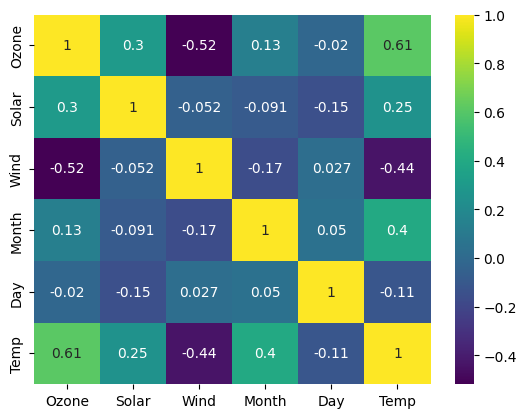

In [46]:
sns.heatmap(data2._get_numeric_data().corr(), annot=True, cmap='viridis')
plt.show()

#### Automating EDA

#### a. Using ydata_profiling

In [ ]:
#!pip install ydata_profiling

In [47]:
import ydata_profiling as pp

In [48]:
EDA_report= pp.ProfileReport(orig_data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#### b. Using sweetviz

In [ ]:
#!pip install sweetviz

In [49]:
import sweetviz as sv

In [51]:
sweet_report = sv.analyze(orig_data)
sweet_report.show_html('weather_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
